<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [18]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url, index_col=0)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset
The following describes the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [23]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot

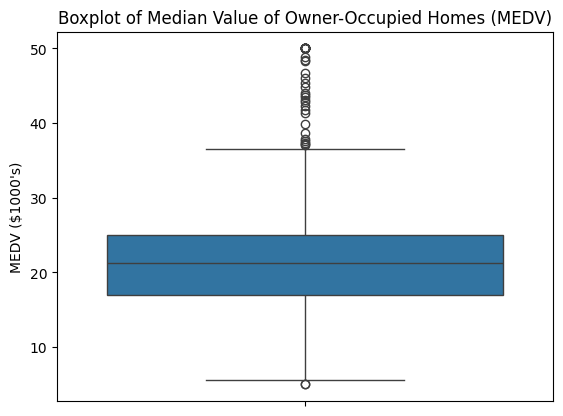

In [26]:
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

2. Provide a bar plot for the Charles river variable

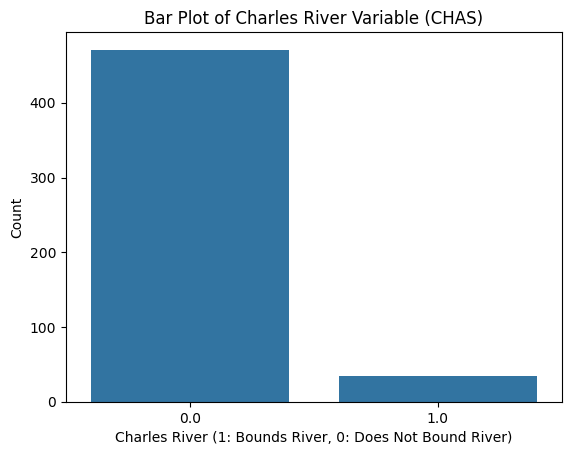

In [29]:
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River (1: Bounds River, 0: Does Not Bound River)')
plt.ylabel('Count')
plt.show()

One can observe that there are many more homes that are not bound by the Charles river than homes that are. This suggest that these homes are in a lower supply and potentially more valuable.

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

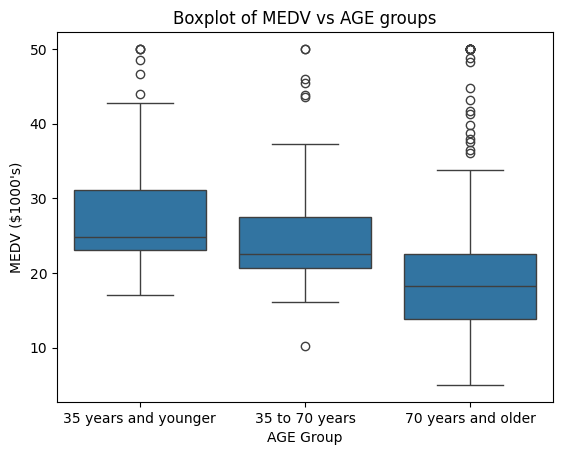

In [37]:
bins = [0, 35, 70, 150]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

The box plot shows that the Median value of owner occupied homes decreases as the age of the home increases. This is to be expected.

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



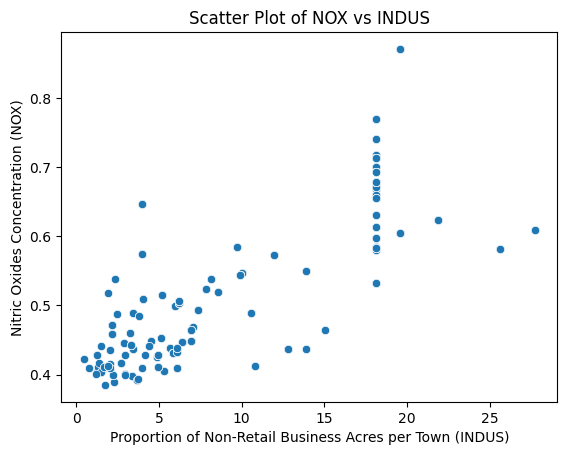

In [32]:
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

There appears to be a weak positive relationship between the variables.

5. Create a histogram for the pupil to teacher ratio variable

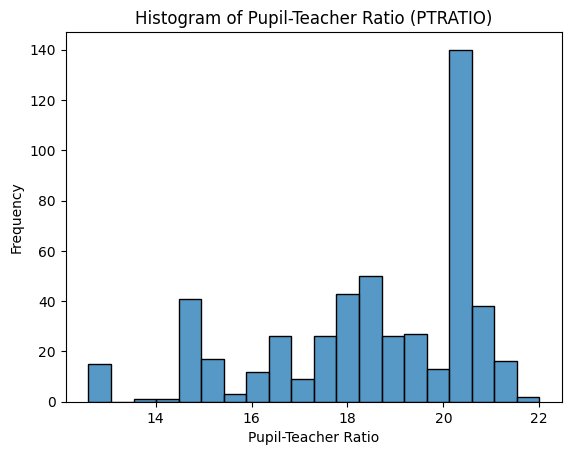

In [36]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

### Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the Hypotheses: <br/>
H0 = no difference in the median value of houses bounded by the Charles river <br/>
H1 = a difference in the median value of houses bounded by the Charles river

In [39]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In conclusion, the pvalue is less than 0.05 so we reject the null hypothesis (H0) and accept the alternative hypothesis (H1) meaning there is a significant difference in median value of houses bounded by the Charles river.

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


State the Hypotheses: <br/>
H0 = no difference in the median value of houses for each proportion of owner occupied units built prior to 1940 (AGE) <br/>
H1 = there is a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 (AGE)

In [41]:
younger = boston_df[boston_df['AGE'] <= 35]['MEDV']
medium = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
older = boston_df[boston_df['AGE'] >= 70]['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(younger, medium, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In conclusion, the pvalue is less than 0.05 so we reject the null hypothesis (H0) and accept the alternative hypothesis (H1) meaning there is a significant difference in median value of houses for each proportion of AGE.

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the Hypotheses: <br/>
H0: there is no relationship between Nitric oxide concentrations and proportions of non-retail business acres per town. <br/>
H1: there is a relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.

In [45]:
corr_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"corr_coefficient: {corr_coefficient}, P-Value: {p_value}")

corr_coefficient: 0.7636514469209192, P-Value: 7.913361061210442e-98


In conclusion, the p-value is less than 0.05 so we reject the null hypothesis (H0) and accept the alternative hypothesis (H1) that there is a significant relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: there is no impact of additional weighted distance to the five Boston employment centres on median value of owner occupied homes. <br/>
H1: there is an impact of additional weighted distance to the five Boston employment centres on median value of owner occupied homes.

In [48]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        22:06:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In conclusion, the p-value is less than 0.05 so we reject the null hypothesis as there is sufficient evidence to suggest that there is an impact of additional weighted distance to the five Boston employment centre in the median value of owner occupied homes.